In [3]:
# Lineer Regresyon Nedir?
# Bir ilişkiyi, olayı açıklamak ve tahmin etmek için kullanılan temel ml yaklaşımlarındandır. Lineer regresyon ile bir baımlı değişkeni etkilediği düşünülen bir bağımsız değişkeni kullanarak model kurulur.
# Kullanım Alanları
# 1- Ev Fiyat Tahmini
# 2- Satış Miktarı Tahmini

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
df = pd.read_csv("dataset/CarPrice_Assignment.csv")
print(df)
# Bu senaryoda araç ilişkisi ve fiyat özelliklerini inceleyeceğiz.

     car_ID  symboling                   CarName  ... citympg highwaympg    price
0         1          3        alfa-romero giulia  ...      21         27  13495.0
1         2          3       alfa-romero stelvio  ...      21         27  16500.0
2         3          1  alfa-romero Quadrifoglio  ...      19         26  16500.0
3         4          2               audi 100 ls  ...      24         30  13950.0
4         5          2                audi 100ls  ...      18         22  17450.0
..      ...        ...                       ...  ...     ...        ...      ...
200     201         -1           volvo 145e (sw)  ...      23         28  16845.0
201     202         -1               volvo 144ea  ...      19         25  19045.0
202     203         -1               volvo 244dl  ...      18         23  21485.0
203     204         -1                 volvo 246  ...      26         27  22470.0
204     205         -1               volvo 264gl  ...      19         25  22625.0

[205 rows x 26 

In [8]:
# Lineer regresyonun verilmiş x değerlierini temsil edeceklerini bulmak için y değerine ulaşabileceğimiz denkleme odaklanılması gerekir.
# Yani x bağımsız bir değişken olarak aracın motor gücü; y bağımlı değişken olarak aracın fiyatı
X = df[["enginesize"]]
y = df[["price"]]
regression_model = LinearRegression().fit(X,y)

In [9]:
regression_model.intercept_[0] #bias değeri yani sabit

-8005.445531145197

In [10]:
regression_model.coef_[0][0] #motor gücü

167.6984163931721

In [ ]:
# Eğer x in katsayısı 0dan büyük olması eğilimin pozitif yönde olduğunu; yani bir değişkenin artışının diğğer değişkeni de arttırdığını ifade eder.
# Şimdi ise model denklemini çizip, y değerlerini nasıl tahmin edeceğimize bakalım.

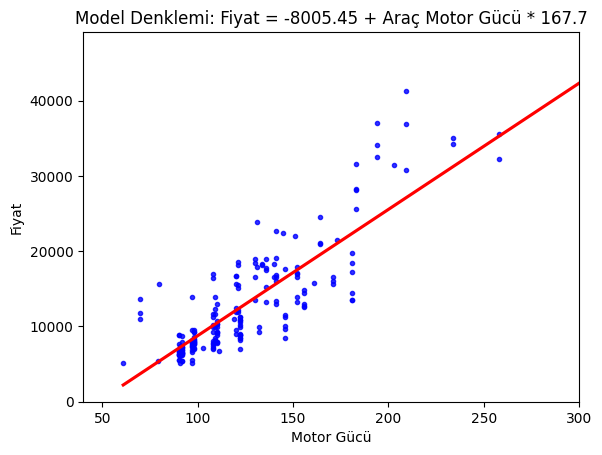

In [15]:
g = sns.regplot(x=X,y=y,scatter_kws={'color':'b','s':9} , ci=False, color="r")
g.set_title(f"Model Denklemi: Fiyat = {round(regression_model.intercept_[0], 2)} + Araç Motor Gücü * {round(regression_model.coef_[0][0], 2)}")
g.set_ylabel("Fiyat")
g.set_xlabel("Motor Gücü")
plt.xlim(40,300)
plt.ylim(bottom=0)
plt.show()

In [ ]:
# Elde edilen denkleme göre motor gücnün artışı fiyatın da artışına neden olur.

In [ ]:
# MAE ile model başarısı ölçümü

In [16]:
y_pred = regression_model.predict(X)
mean_absolute_error(y,y_pred)

2815.022353836411

In [ ]:
# Model ile yapılan tahminlerde ortalama 2815 birimlik bir sapma mevcuttur. 